In [295]:
target_width = 300.0
target_height = 110.0
target_elevation = 40.0

height_offset = 250

target_ratio = target_height / target_width

In [296]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Open the PNG file
heightmap = Image.open(r'files\heightmap.png')
terrainmap = Image.open(r'files\terrainmap.png')

heightmap = cv2.imread(r'files\heightmap.png')
terrainmap = cv2.imread(r'files\terrainmap.png')

heightmap = cv2.cvtColor(heightmap, cv2.COLOR_RGB2GRAY)
#terrainmap = cv2.cvtColor(terrainmap, cv2.COLOR_RGB2GRAY)

# Convert the image to a numpy array
heightmap_array = np.array(heightmap)
terrainmap_array = np.array(terrainmap)

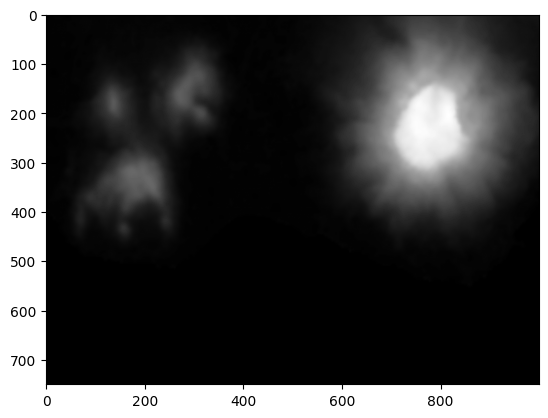

In [297]:
# Display the image using matplotlib
plt.imshow(heightmap_array, cmap='gray')
plt.show()

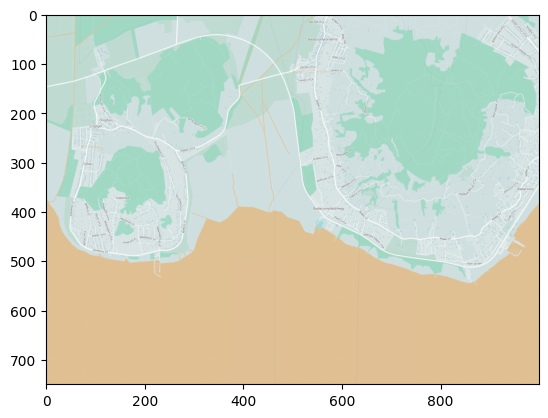

In [298]:
# Display the image using matplotlib
plt.imshow(terrainmap_array)
plt.show()

In [299]:
heightmap_array.shape

(750, 1000)

In [300]:
heightmap_width = heightmap_array.shape[0]
cropped_height = int(target_ratio * heightmap_width)

h0 = height_offset
h1 = height_offset + cropped_height
heightmap_array = heightmap_array[h0:h1, :]
terrainmap_array = terrainmap_array[h0:h1, :]

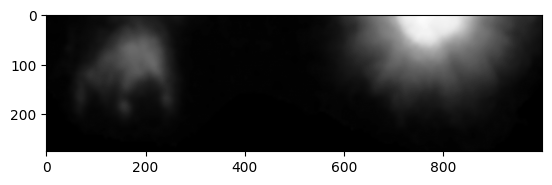

In [301]:
plt.imshow(heightmap_array, cmap='gray')
plt.show()

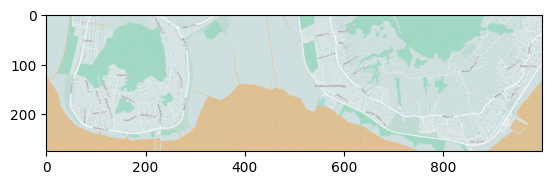

In [302]:
# Display the image using matplotlib
plt.imshow(terrainmap_array)
plt.show()

In [303]:
#heightmap_array = np.flipud(heightmap_array)

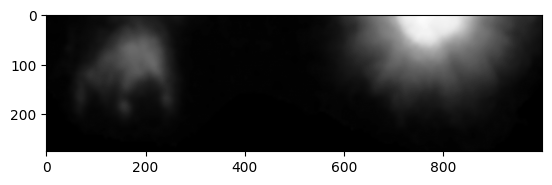

In [304]:
plt.imshow(heightmap_array, cmap='gray')
plt.show()

In [305]:
from polymesh import PolyData, PointData, CartesianFrame
from polymesh.cells import T3
from polymesh.grid import grid
from polymesh.utils.topology import Q4_to_T3

sx, sy = heightmap_array.shape[:2]

coords, topo = grid(size=(target_height, target_width), shape=(sx-1, sy-1), eshape="Q4")
_coords = np.zeros((coords.shape[0], 3), dtype=float)
_coords[:, :2] = coords
coords = _coords

scalar = target_elevation / heightmap_array.max()

coords[:, -1] = np.ravel(heightmap_array, order="C") * scalar

frame = CartesianFrame(dim=3)

coords, topo = Q4_to_T3(coords, topo)
pd = PointData(coords, frame=frame)
cd = T3(topo, frame=frame)

mesh = PolyData(pd, cd)

mesh.rotate("Space", [0, 0, np.pi/2], "123")

PolyData({})

In [306]:
mesh.plot(notebook=False, jupyter_backend="static", show_edges=False)

In [307]:
coords[:, 0].min(), coords[:, 0].max()

(0.0, 110.00000000000001)

In [308]:
coords[:, 1].min(), coords[:, 1].max()

(0.0, 300.0)

In [309]:
coords[:, -1].min(), coords[:, -1].max()

(0.0, 40.0)